## Air Quality Forecast 2 : Data Analysis
### In this ipython notebook, I'll discuss:
- Q1 Trend in AQI (w.r.t hour, weekday, etc)
- Q2 Trend in different chemicals
- Q3 Relationship between chemicals
- Q4 Relationship between chemicals and AQI

In [76]:
import pandas as pd
%matplotlib inline
%pylab inline
import pprint

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
pylab.rcParams['figure.figsize'] = (20, 10) 

plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [83]:
# to know more about AQdata_clean.csv, check AQdata01_cleaning
df = pd.read_csv('./AQdata_clean.csv')
df.head()

DateTime  idx        Date  Day  Hour  Weekday  Week  Month  \
0  2004-03-10 18:00:00    0  2004-03-10   10    18        3    11      3   
1  2004-03-10 19:00:00    1  2004-03-10   10    19        3    11      3   
2  2004-03-10 20:00:00    2  2004-03-10   10    20        3    11      3   
3  2004-03-10 21:00:00    3  2004-03-10   10    21        3    11      3   
4  2004-03-10 22:00:00    4  2004-03-10   10    22        3    11      3   

   Season  PT08.S1(CO)     ...       CO(GT)  CO(GT)_level  C6H6(GT)  NOx(GT)  \
0  spring       1360.0     ...          2.6             1      11.9    166.0   
1  spring       1292.0     ...          2.0             1       9.4    103.0   
2  spring       1402.0     ...          2.2             1       9.0    131.0   
3  spring       1376.0     ...          2.2             1       9.2    172.0   
4  spring       1272.0     ...          1.6             1       6.5    131.0   

   NO2(GT)  NO2(GT)_level     T    RH      AH          AQI  
0    113.0              3  13.6  48.9  0.7578  1692.000000  
1     92.0              2  13.3  47.7  0.7255  1592.250000  
2    114.0              3  11.9  54.0  0.7502  1566.461538  
3    122.0              3  11.0  60.0  0.7867  1578.300000  
4    116.0              3  11.2  59.6  0.7888  1519.190083  

[5 rows x 24 columns]

In [84]:
df.columns

Index(['DateTime', 'idx', 'Date', 'Day', 'Hour', 'Weekday', 'Week', 'Month',
       'Season', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'CO(GT)', 'CO(GT)_level', 'C6H6(GT)',
       'NOx(GT)', 'NO2(GT)', 'NO2(GT)_level', 'T', 'RH', 'AH', 'AQI'],
      dtype='object')

In [85]:
# group features with list

AQcol = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'CO(GT)', 'CO(GT)_level', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'NO2(GT)_level', 'T', 'RH',
       'AH','AQI']
AQcol_PT08 = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)','PT08.S5(O3)']
AQcol_GT = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

In [86]:
df[AQcol].describe()

PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000    9357.000000   9357.000000   9357.000000  9357.000000   
mean   1102.730362     942.548253    832.742225   1453.014535  1030.511916   
std     219.588101     269.581368    255.709423    347.434084   410.916759   
min     647.000000     383.000000    322.000000    551.000000   221.000000   
25%     938.000000     733.000000    655.000000   1228.000000   726.000000   
50%    1062.000000     911.000000    807.000000   1460.000000   964.000000   
75%    1237.000000    1117.000000    968.000000   1677.000000  1287.000000   
max    2040.000000    2214.000000   2683.000000   2775.000000  2523.000000   

            CO(GT)  CO(GT)_level     C6H6(GT)      NOx(GT)      NO2(GT)  \
count  9357.000000   9357.000000  9357.000000  9357.000000  9357.000000   
mean      2.082195      1.080581    10.190392   240.731217   109.414877   
std       1.469801      0.274941     7.565771   206.618453    47.221662   
min       0.100000      1.000000     0.100000     2.000000     2.000000   
25%       1.000000      1.000000     4.400000    97.000000    73.000000   
50%       1.700000      1.000000     8.300000   174.000000   102.000000   
75%       2.800000      1.000000    14.000000   318.000000   137.000000   
max      11.900000      3.000000    63.700000  1479.000000   340.000000   

       NO2(GT)_level            T           RH           AH          AQI  
count    9357.000000  9357.000000  9357.000000  9357.000000  9357.000000  
mean        2.445228    18.317356    48.817431     1.017382  1453.042890  
std         0.656404     8.821883    17.354326     0.404829   335.227498  
min         1.000000    -1.900000     9.200000     0.184700   559.890948  
25%         2.000000    11.900000    35.400000     0.726200  1233.714433  
50%         3.000000    17.600000    48.900000     0.987500  1465.752459  
75%         3.000000    24.300000    61.900000     1.306700  1679.732644  
max         3.000000    44.600000    88.700000     2.231000  2680.313305

In [87]:
#reset index
df.index = df['DateTime']

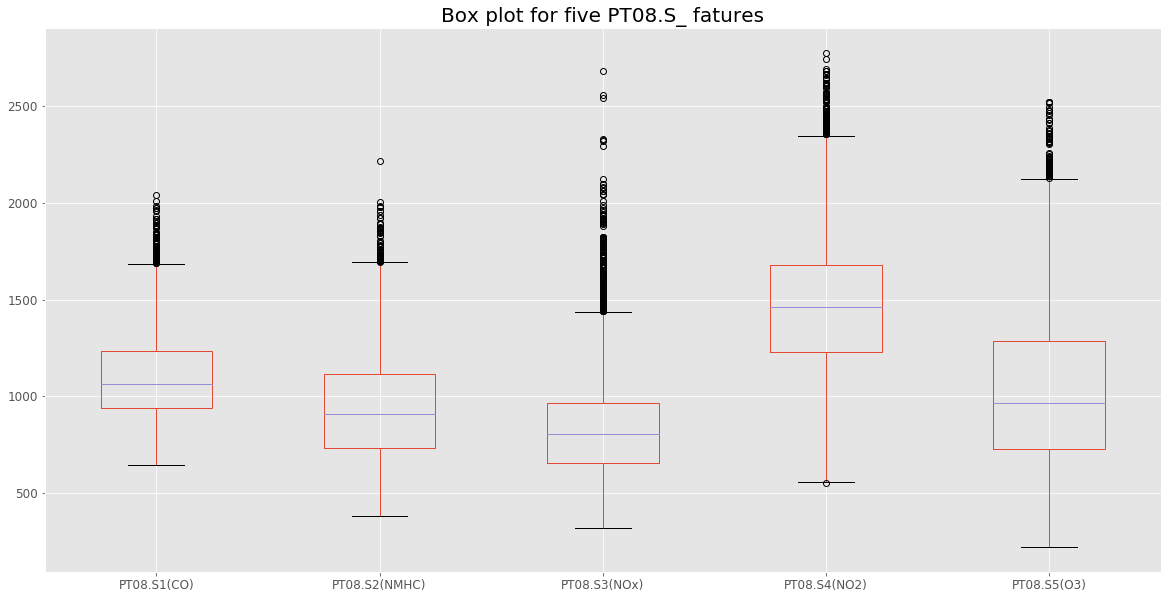

In [88]:
# data distribution in five PTO8 features
df[AQcol_PT08].plot.box()
plt.title('Box plot for five PT08.S_ fatures', fontsize = 20)

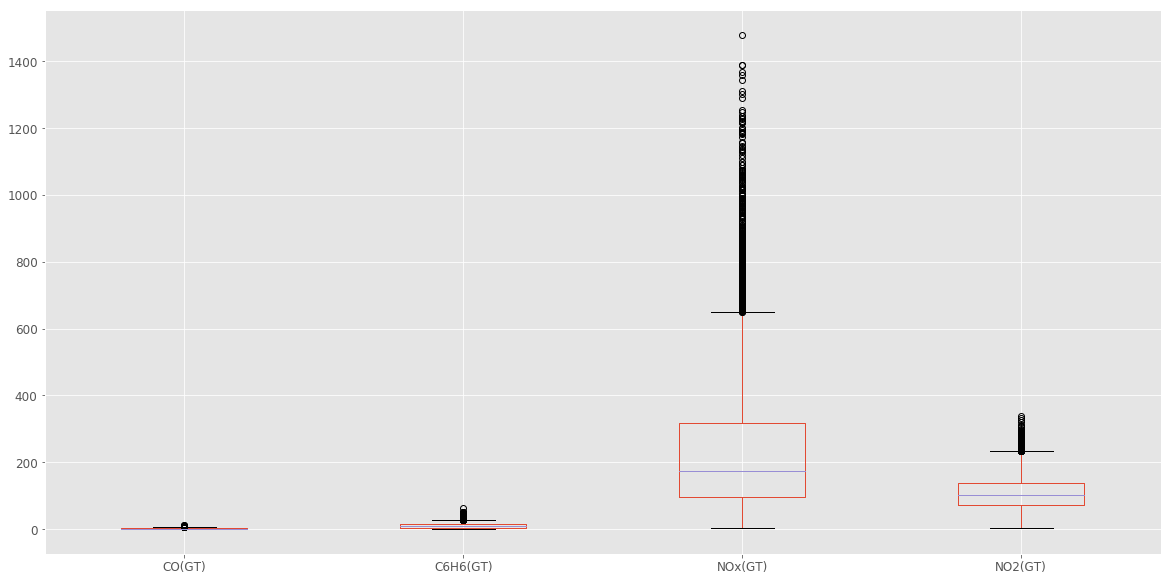

In [89]:
df[AQcol_GT].plot.box()

## Q1 Trends in AQI

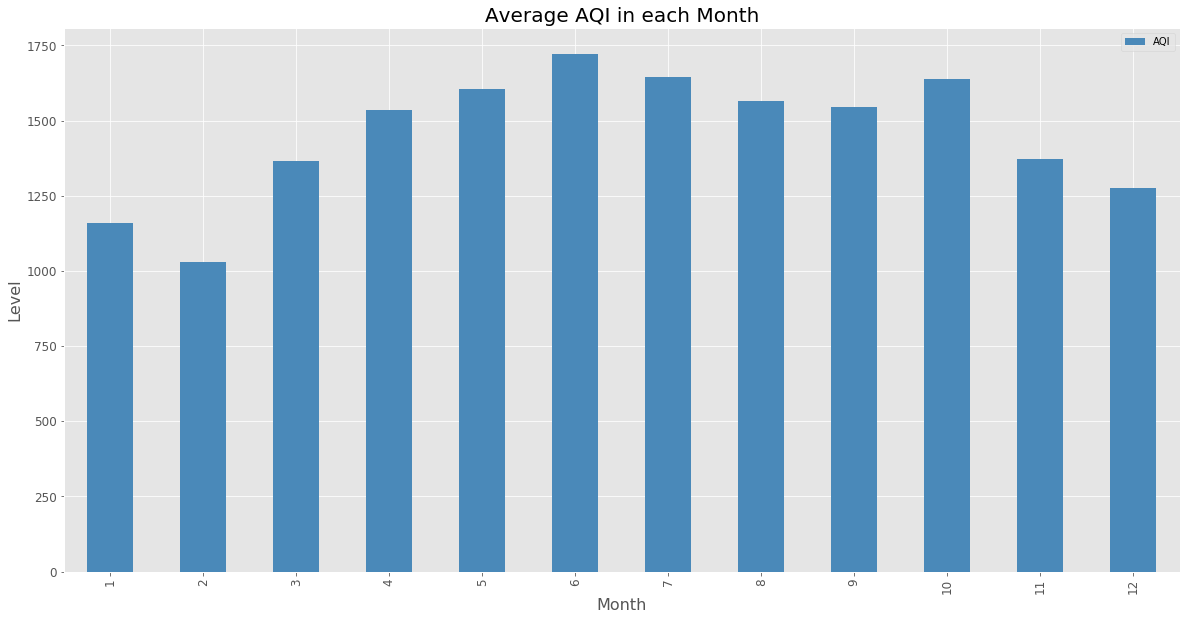

In [90]:
#plot AQI bar in 12 month
df.groupby('Month')['AQI'].mean().plot.bar(legend = True,color = '#4A89B9')
plt.title('Average AQI in each Month', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Month',fontsize = 16)

### Observation: A peak in June, A peak in October. 
- Generally, AQI in summer season is high, while in winter season is low.
- The peak in October is interesting, let's see if we can find out why.

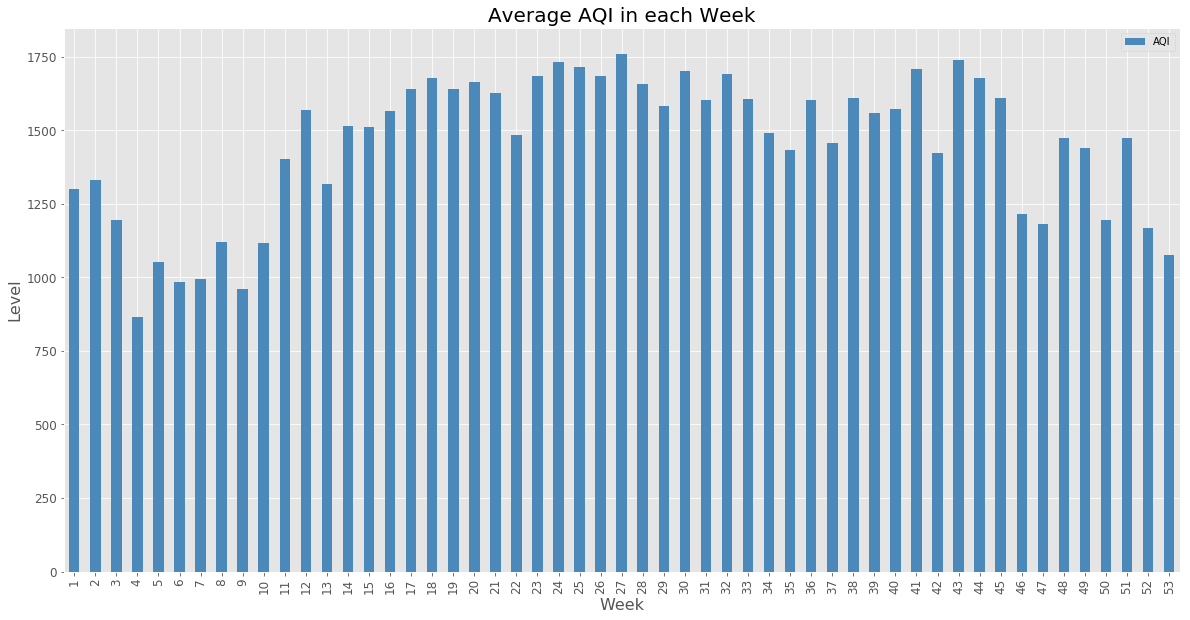

In [91]:
# plot AQI bar in 52 weeks
df.groupby(['Week'])['AQI'].mean().plot.bar(legend = True, color = '#4A89B9' )
plt.title('Average AQI in each Week', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Week',fontsize = 16)

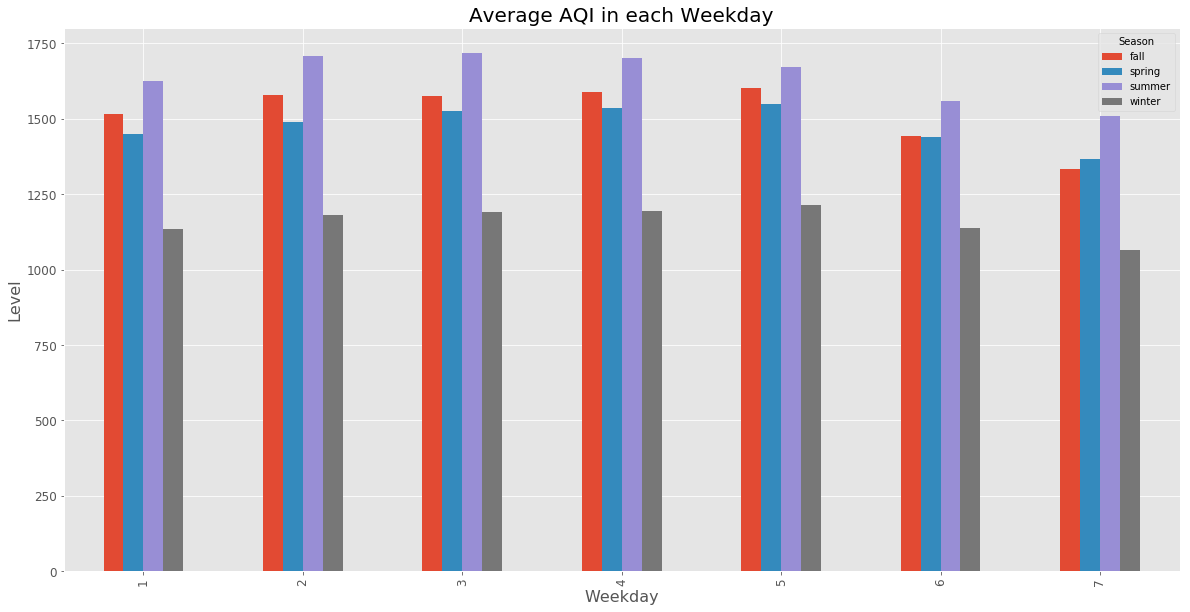

In [92]:
df.groupby(['Weekday', 'Season'])['AQI'].mean().unstack().plot.bar(legend = True)
plt.title('Average AQI in each Weekday', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Weekday',fontsize = 16)

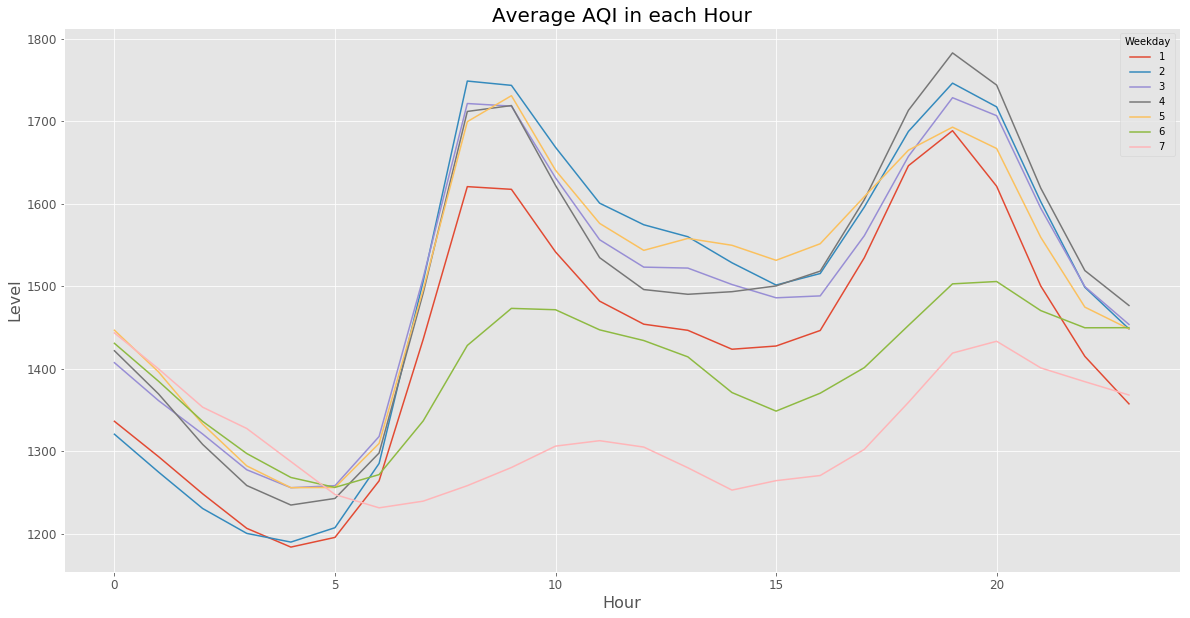

In [24]:
df.groupby(['Hour','Weekday'])['AQI'].mean().unstack().plot(legend = True)
plt.title('Average AQI in each Hour', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Hour',fontsize = 16)

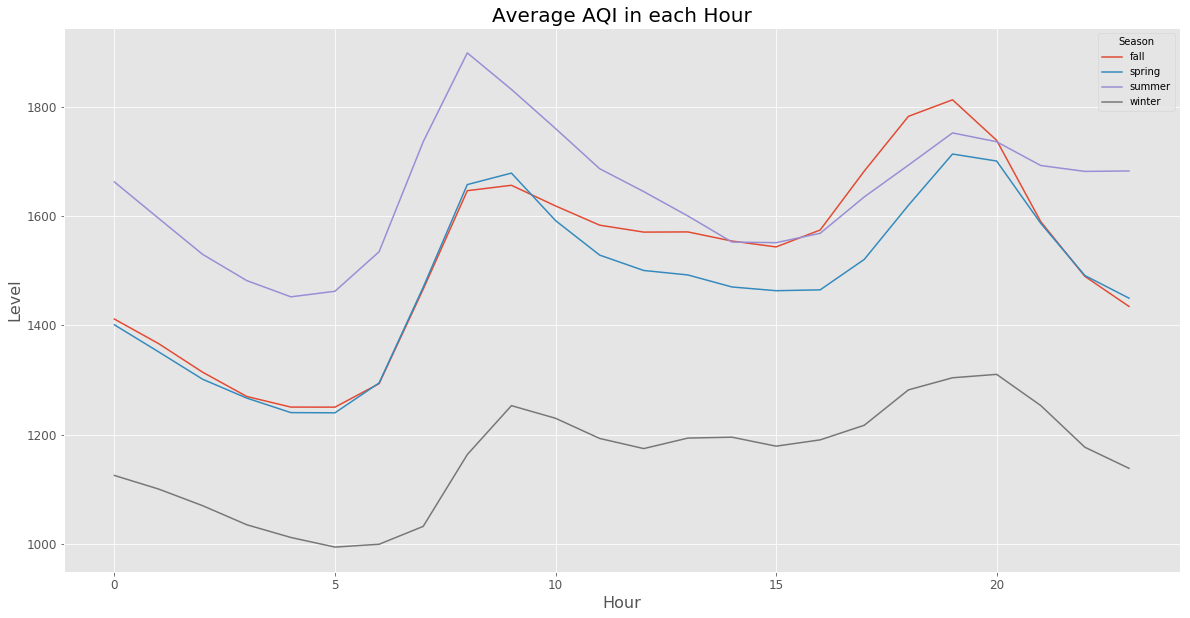

In [93]:
df.groupby(['Hour','Season'])['AQI'].mean().unstack().plot(legend = True)
plt.title('Average AQI in each Hour', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Hour',fontsize = 16)

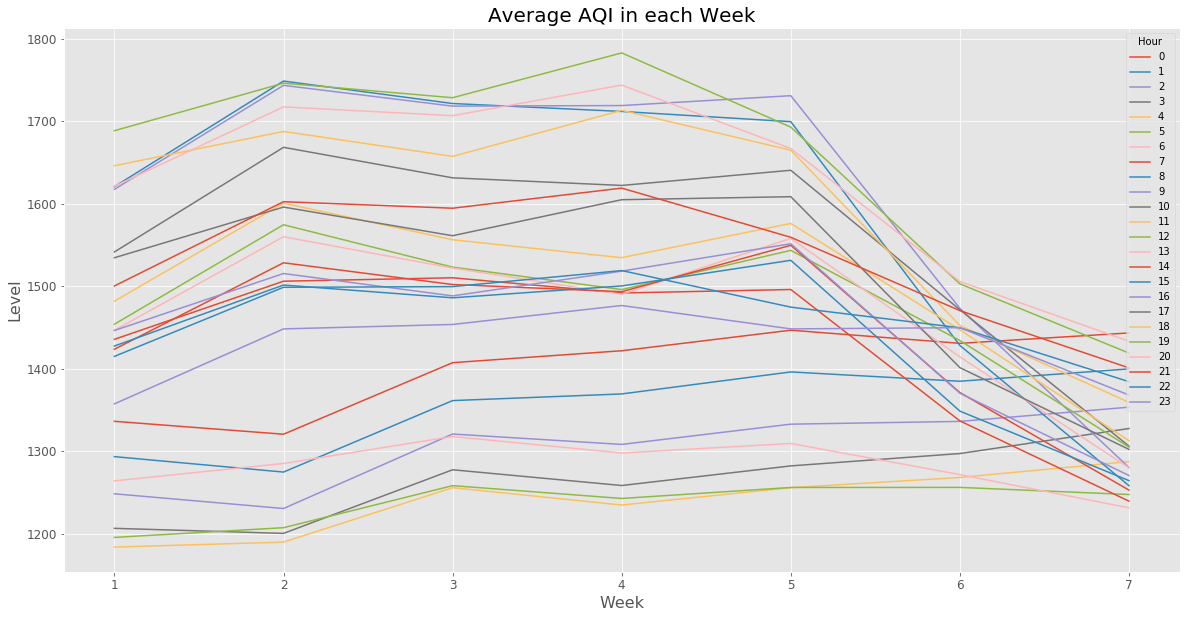

In [94]:
df.groupby(['Weekday','Hour'])['AQI'].mean().unstack().plot(legend = True)
plt.title('Average AQI in each Week', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Week',fontsize = 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108ce7320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109aa72e8>]], dtype=object)

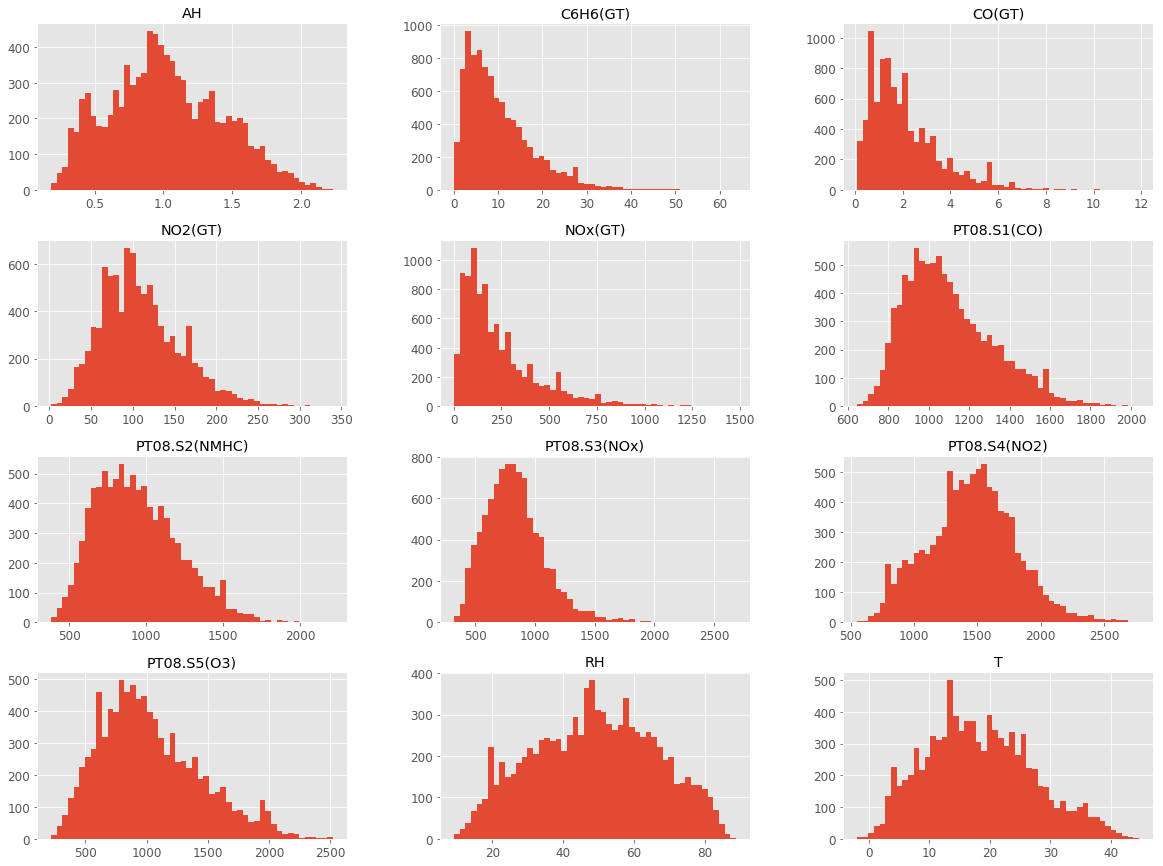

In [14]:
#'After replace missing value'
air = df[AQcol]
air.hist(bins=50, figsize=(20,15))

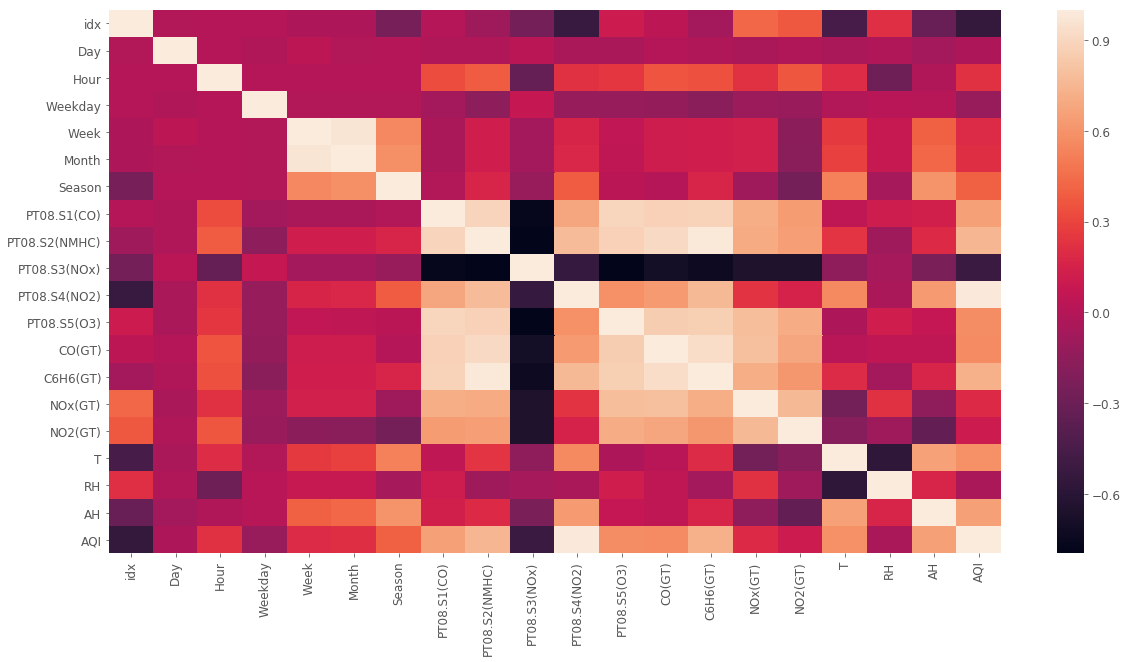

In [257]:
import seaborn as sns
pylab.rcParams['figure.figsize'] = (20, 10) 

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119730b70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a4d14a8>]], dtype=object)

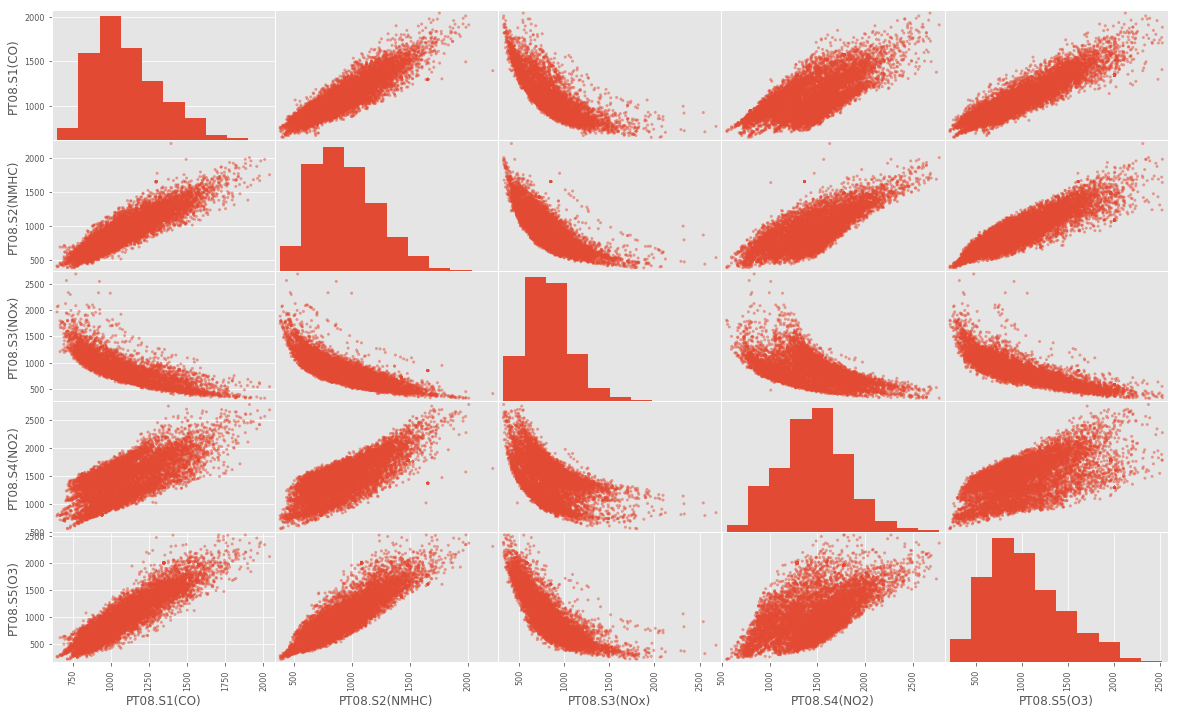

In [31]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df[AQcol_PT08], figsize=(20, 12))

In [263]:
df.corr()['AQI'].sort_values()

idx             -0.547952
PT08.S3(NOx)    -0.521679
Weekday         -0.110188
RH              -0.042416
Day             -0.028217
NO2(GT)          0.108375
NOx(GT)          0.190435
Week             0.193906
Month            0.209171
Hour             0.223788
Season           0.397805
CO(GT)           0.567791
PT08.S5(O3)      0.573614
T                0.589130
AH               0.653837
PT08.S1(CO)      0.655639
C6H6(GT)         0.730844
PT08.S2(NMHC)    0.749167
PT08.S4(NO2)     0.988260
AQI              1.000000
Name: AQI, dtype: float64

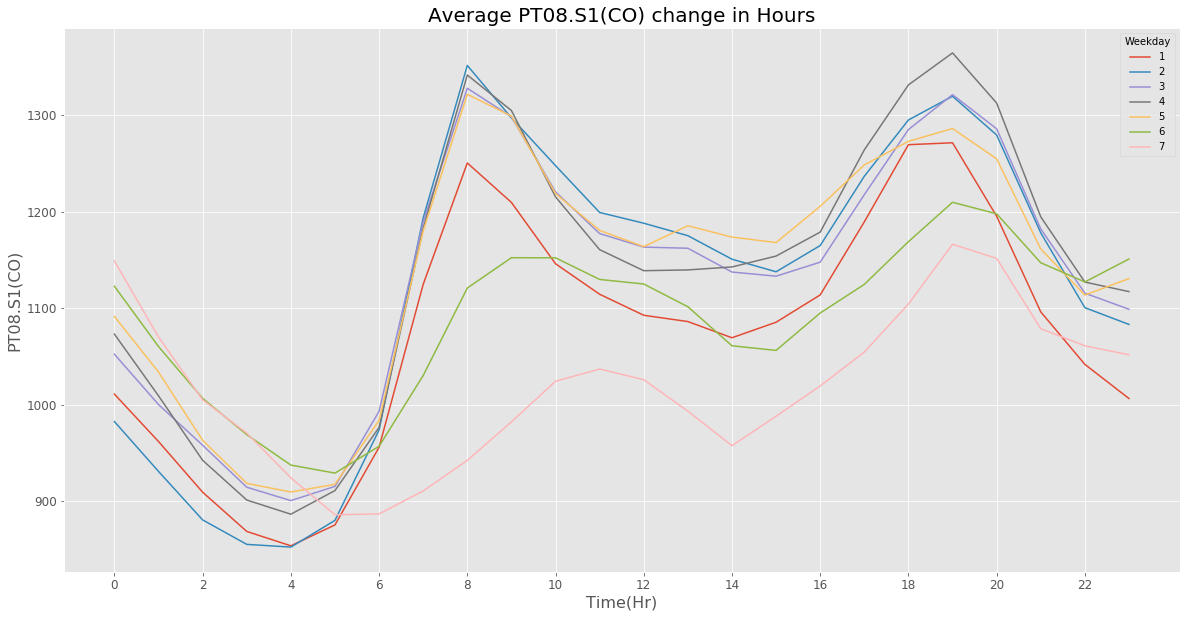

In [25]:
pylab.rcParams['figure.figsize'] = (20, 10) 

def generate_plot(column_name):
    col = column_name
    df.groupby(['Hour','Weekday'])['{}'.format(col)].mean().unstack().plot(legend = True)
    plt.title('Average {} change in Hours'.format(col), fontsize = 20)
    pylab.ylabel('{}'.format(col),fontsize = 16)
    pylab.xlabel('Time(Hr)',fontsize = 16)
    plt.xticks(np.arange(0, 23, 2.0))
    plt.savefig('plot {} change in hours.png'.format(column_name))
generate_plot('PT08.S1(CO)')

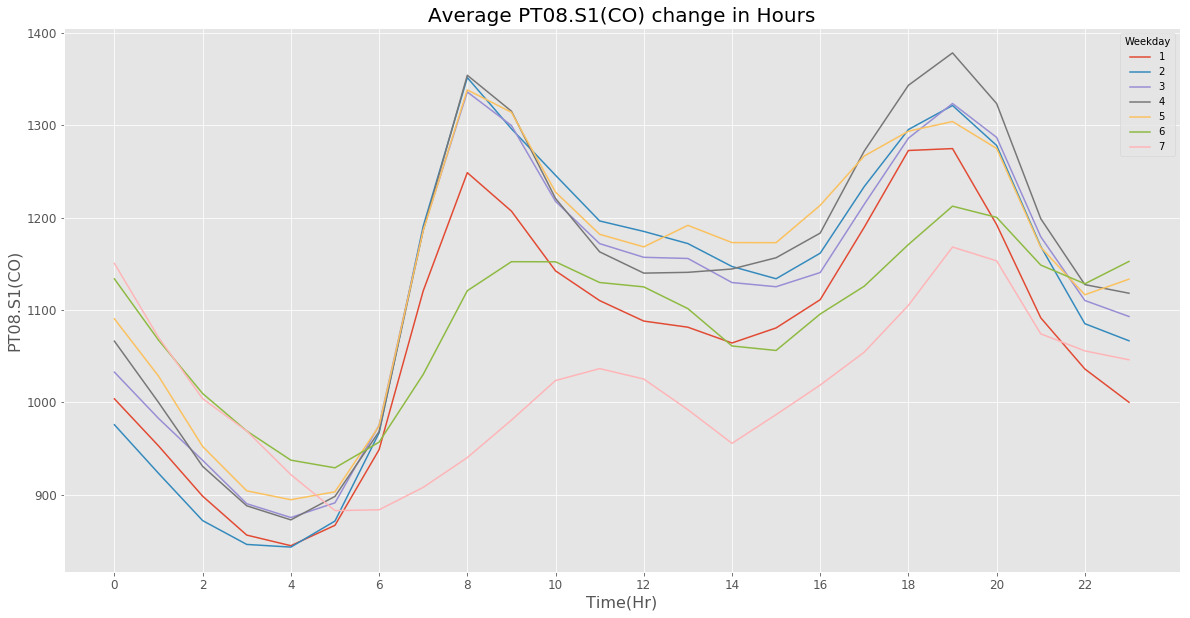

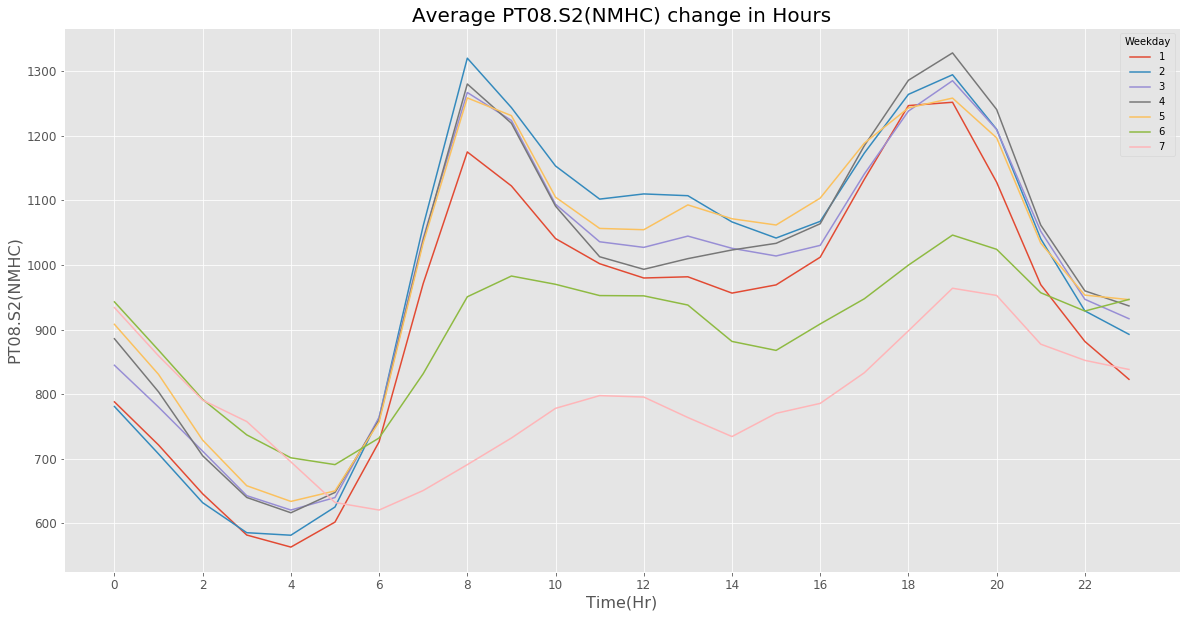

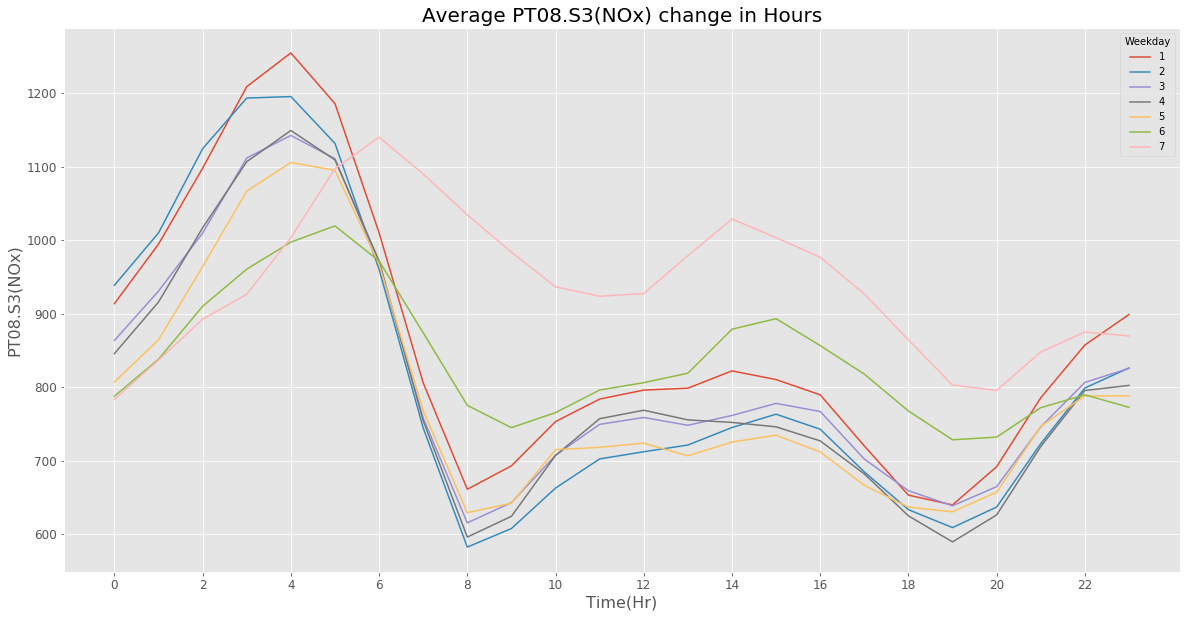

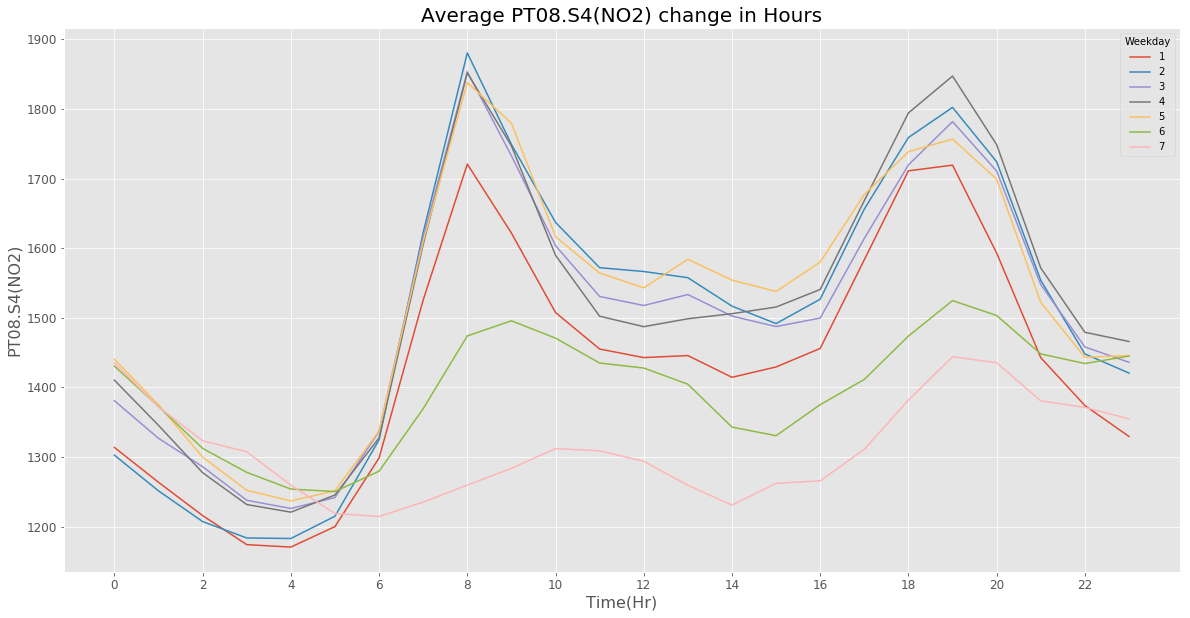

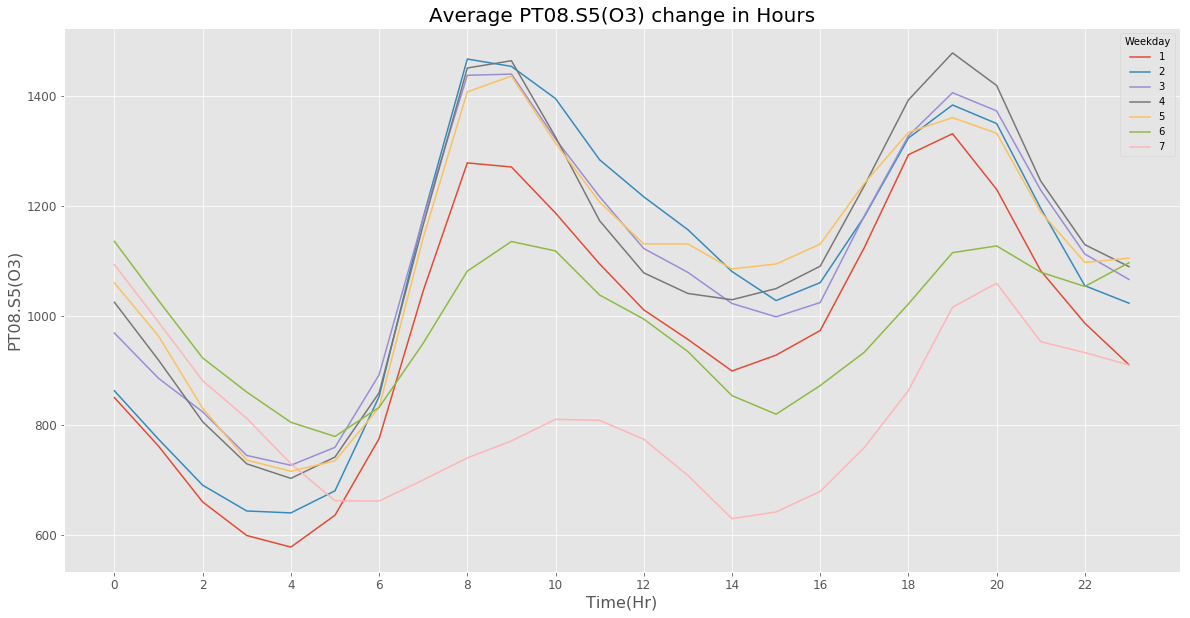

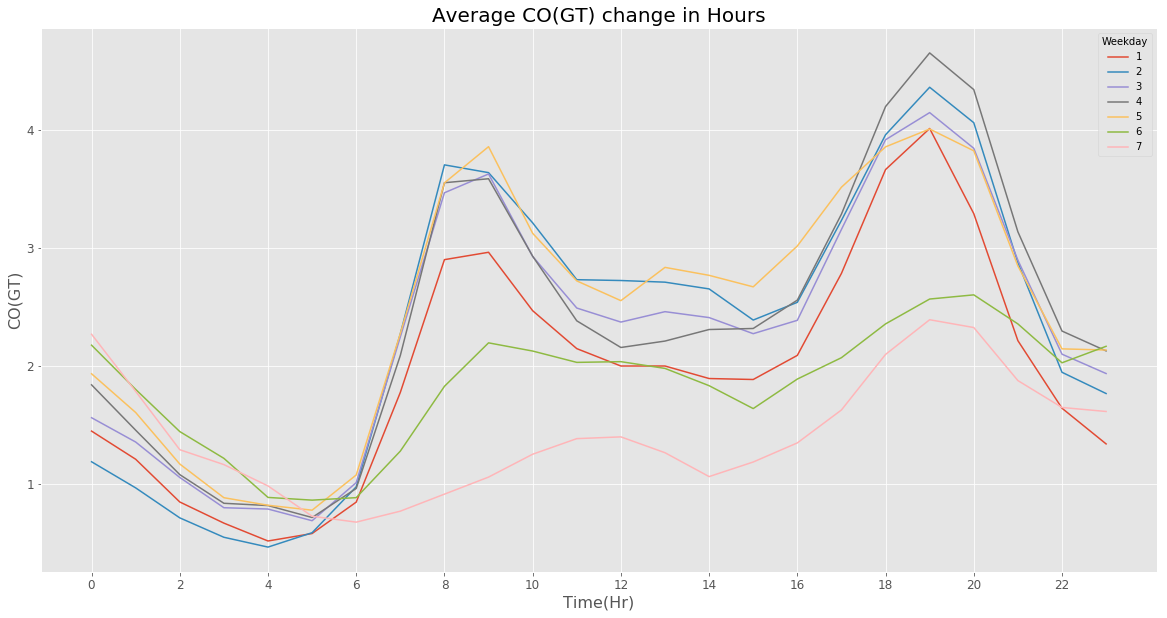

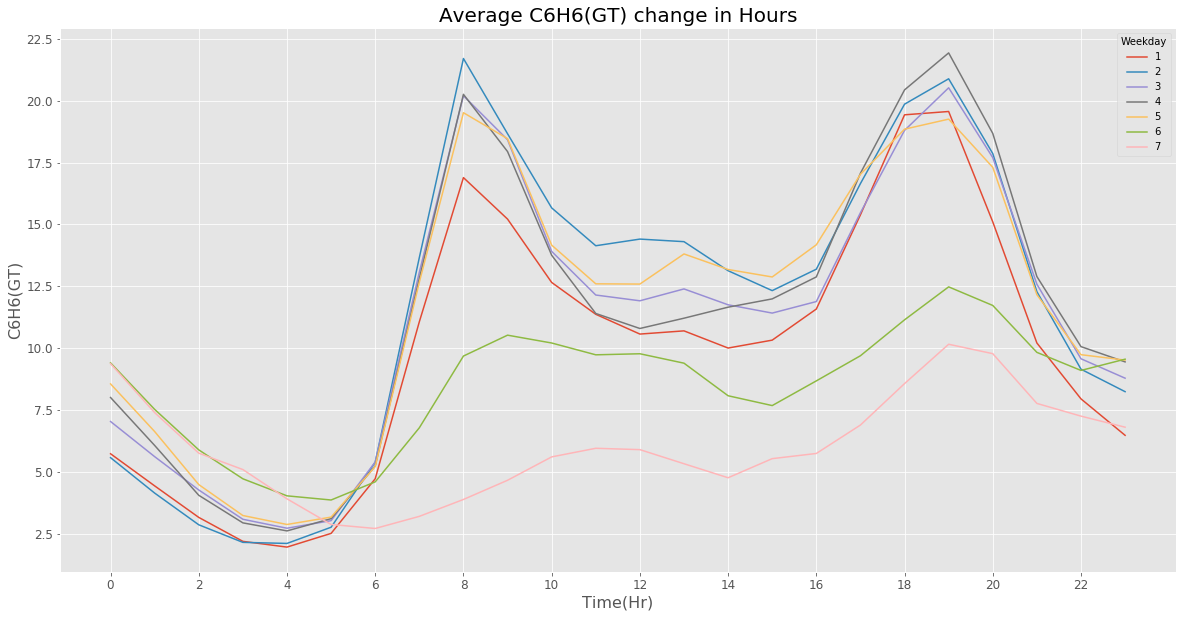

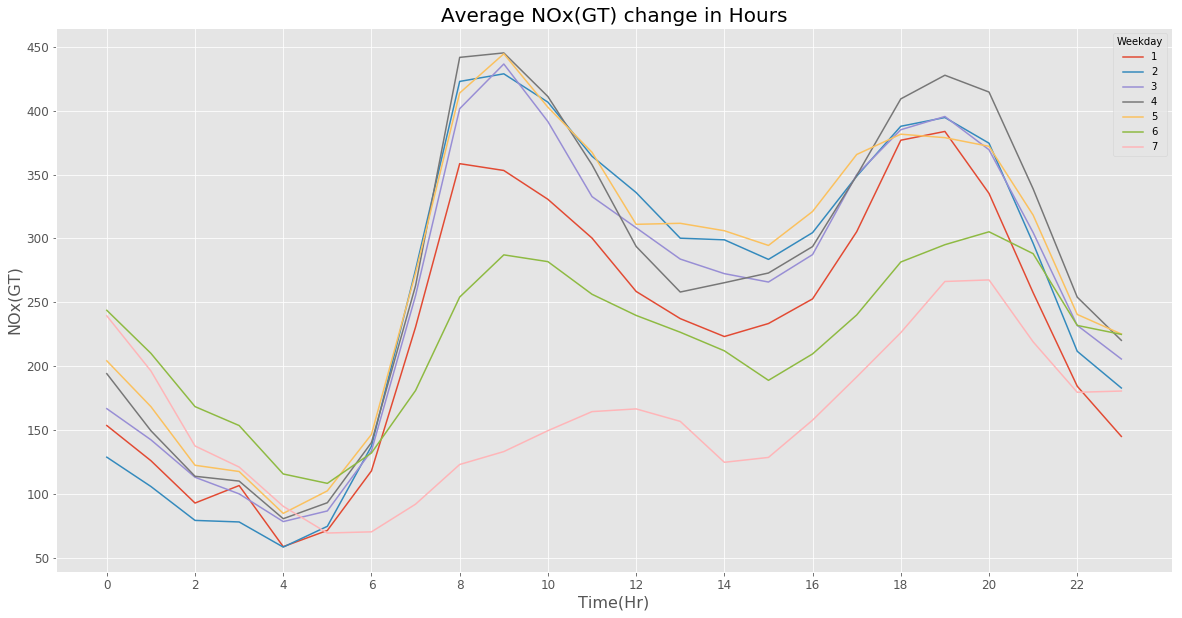

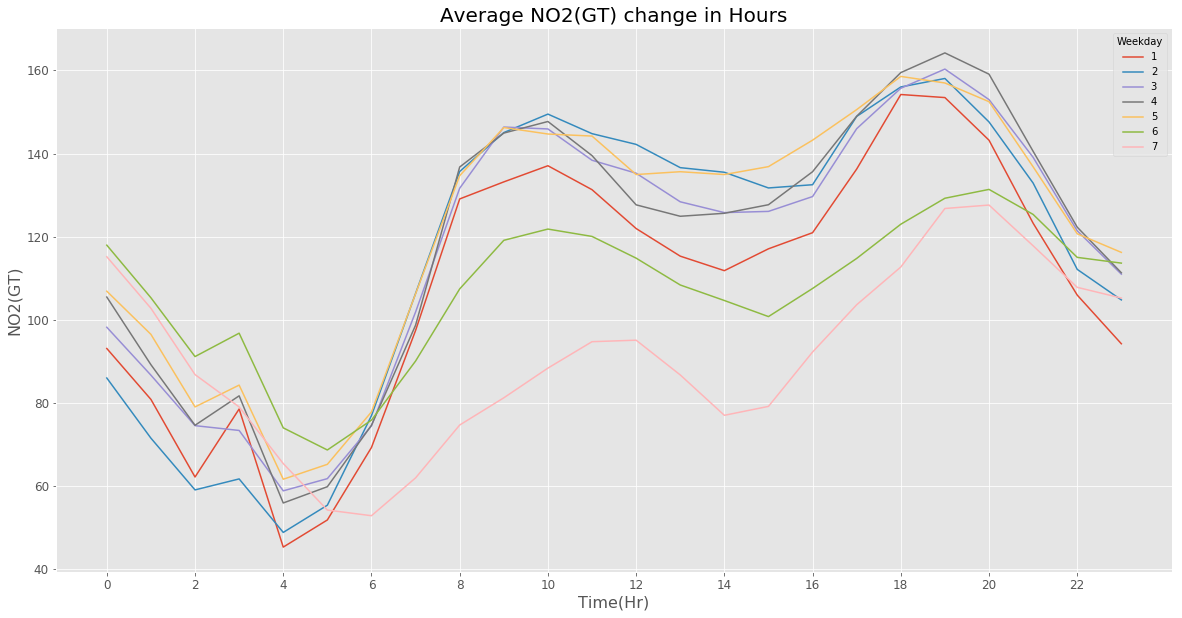

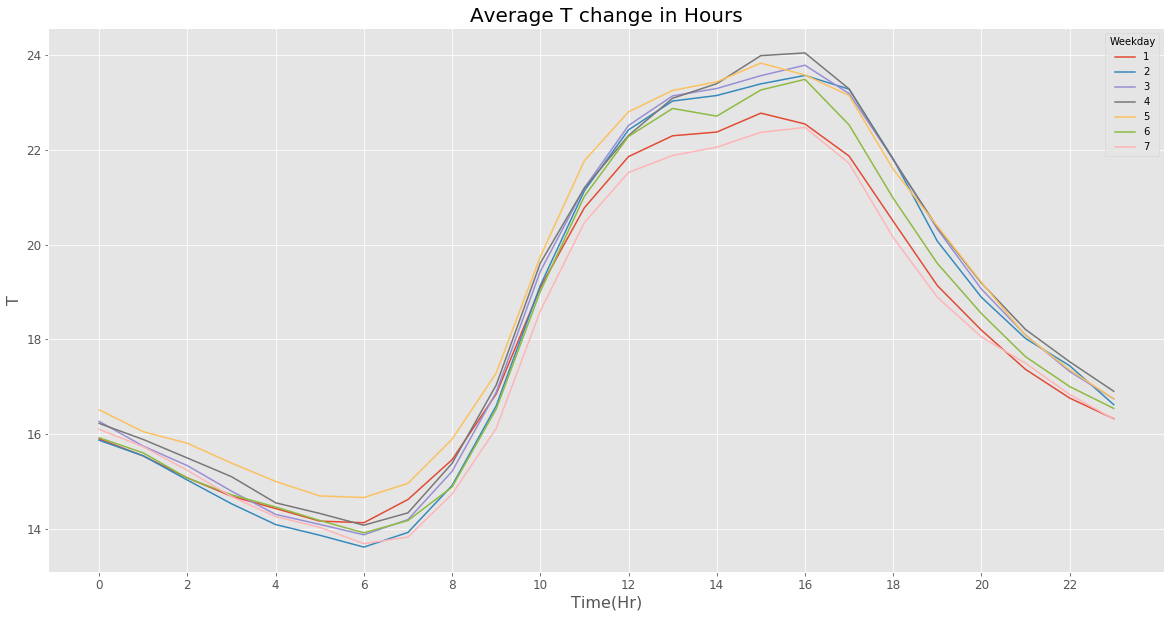

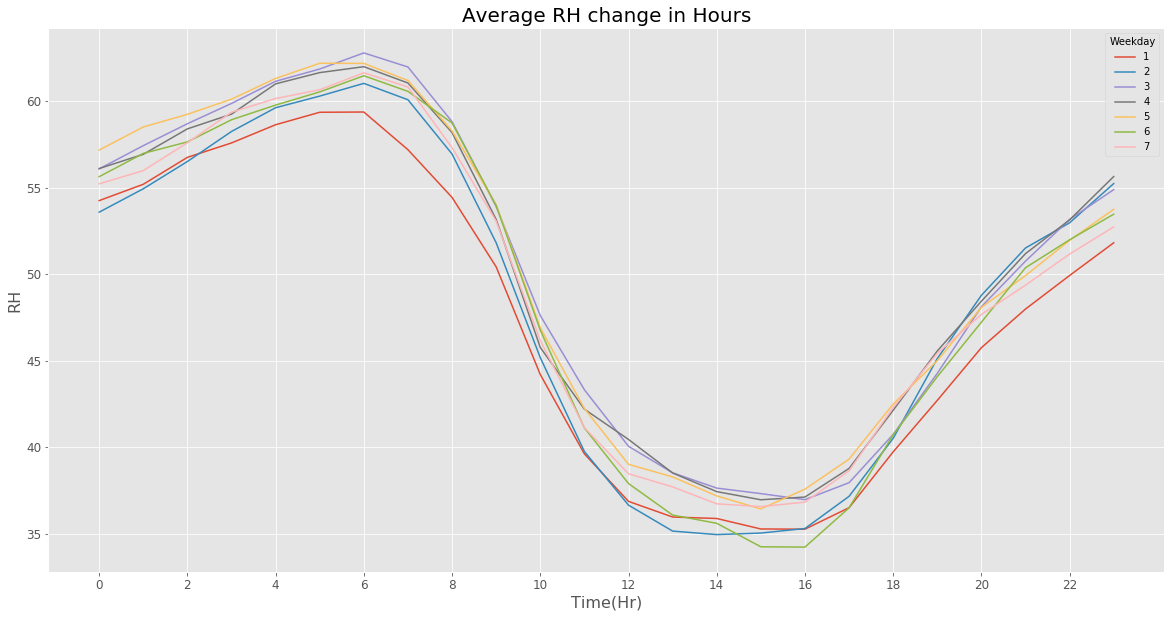

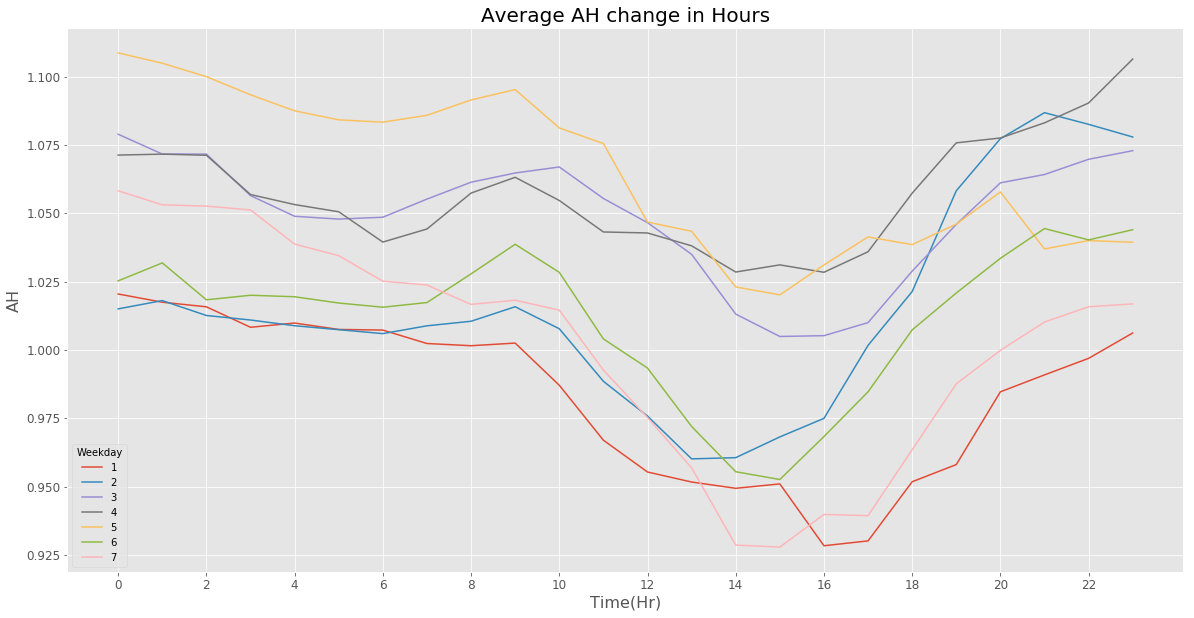

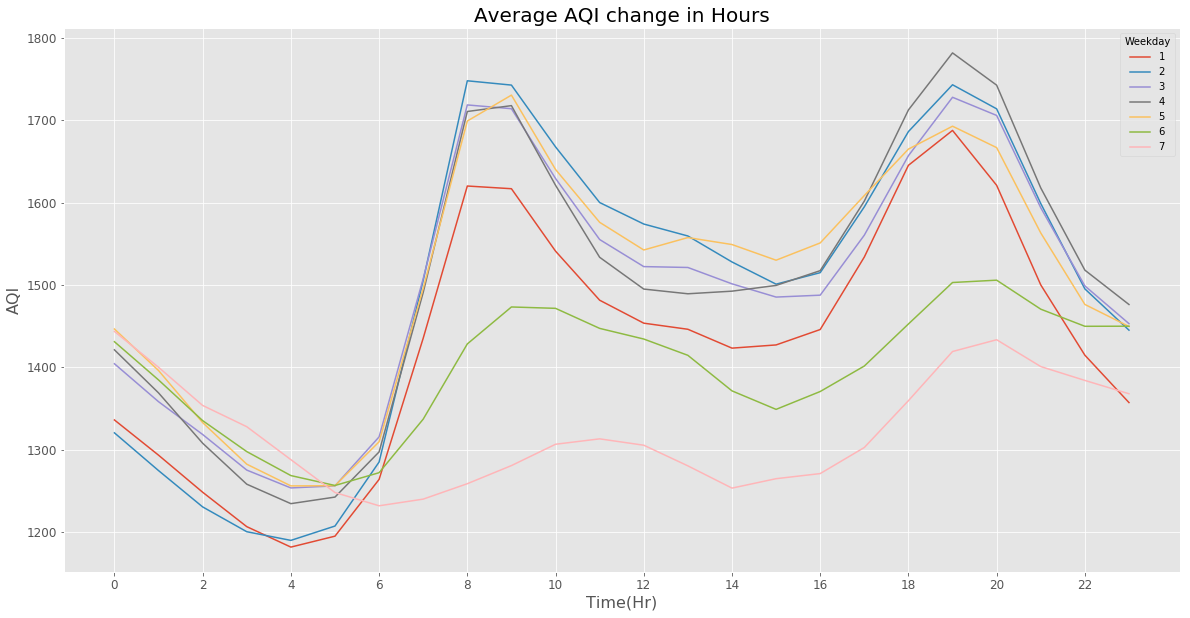

In [256]:
for col in AQcol:
    generate_plot(col)

In [97]:
pylab.rcParams['figure.figsize'] = (20, 10) 

def generate_hour_plot(column_name):
    col = column_name
    df.groupby(['Hour','Season'])['{}'.format(col)].mean().unstack().plot(legend = True)
    plt.title('Average {} change in Hours'.format(col), fontsize = 20)
    pylab.ylabel('{}'.format(col),fontsize = 16)
    pylab.xlabel('Time(Hr)',fontsize = 16)
    plt.savefig('plot {} change in hours[wrt Seanson].png'.format(column_name))

# generate_plot('PT08.S1(CO)')

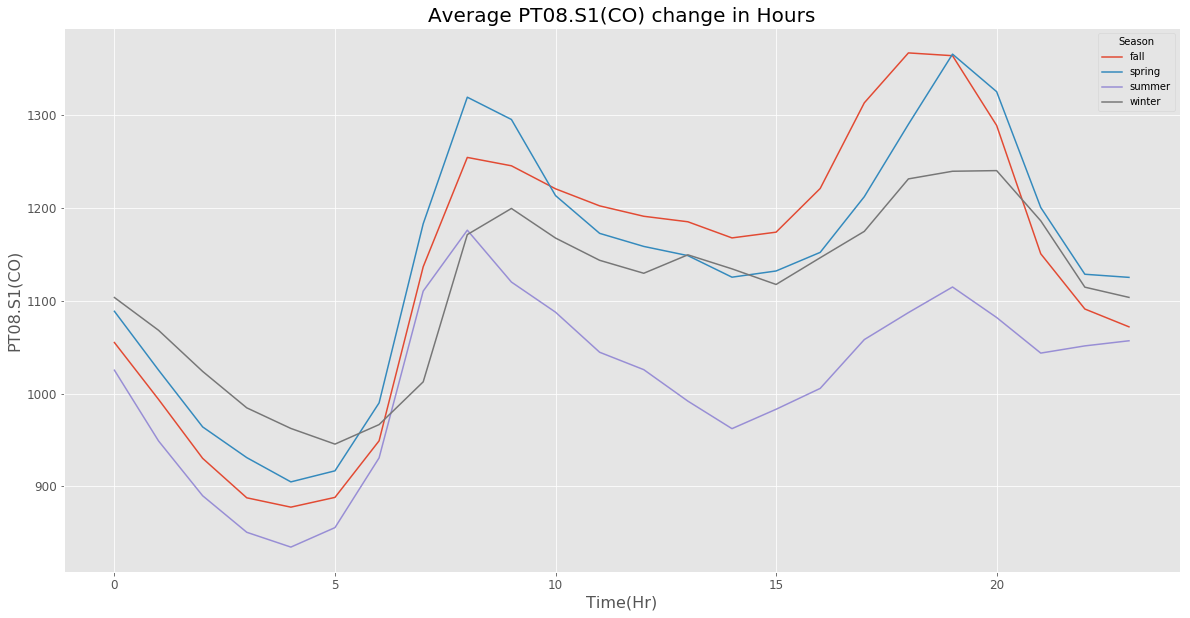

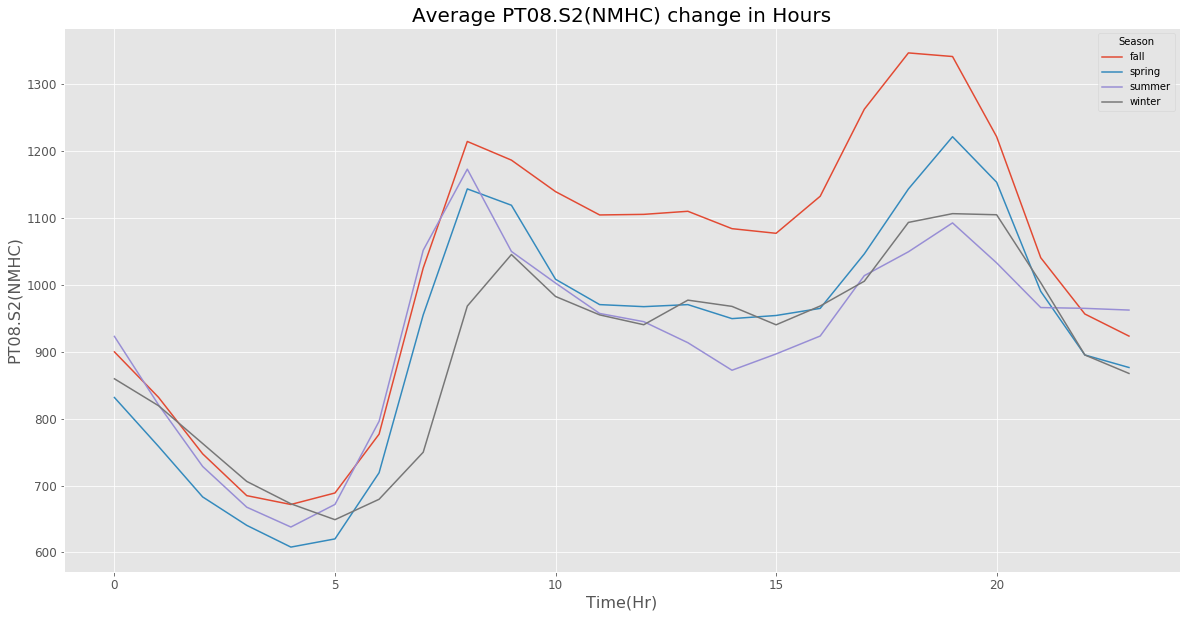

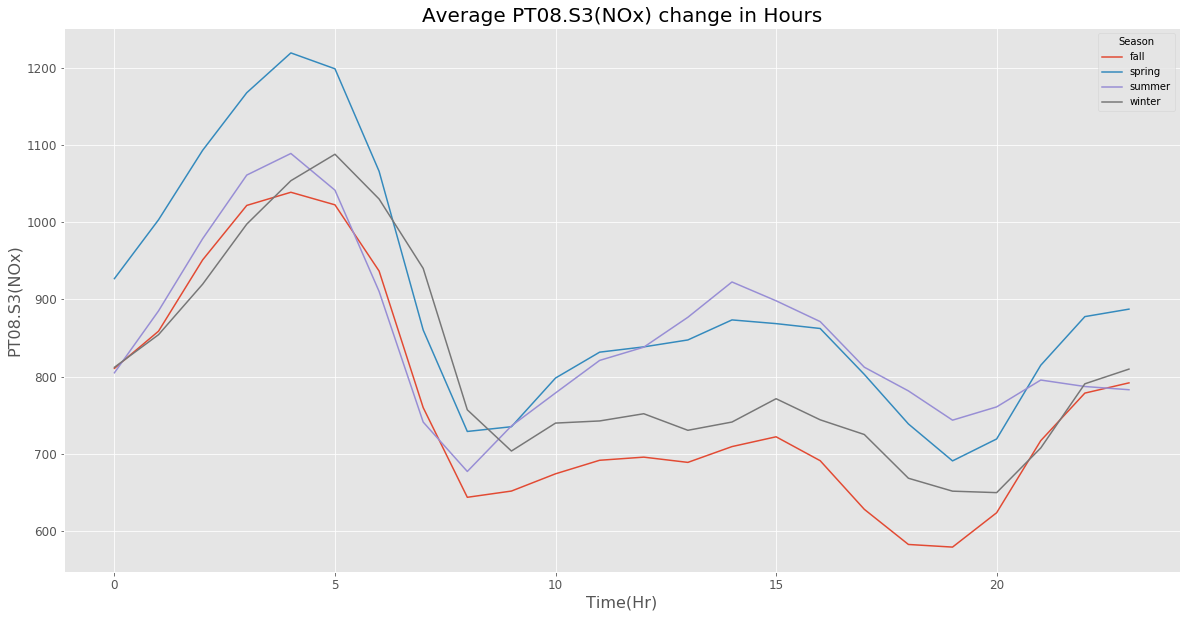

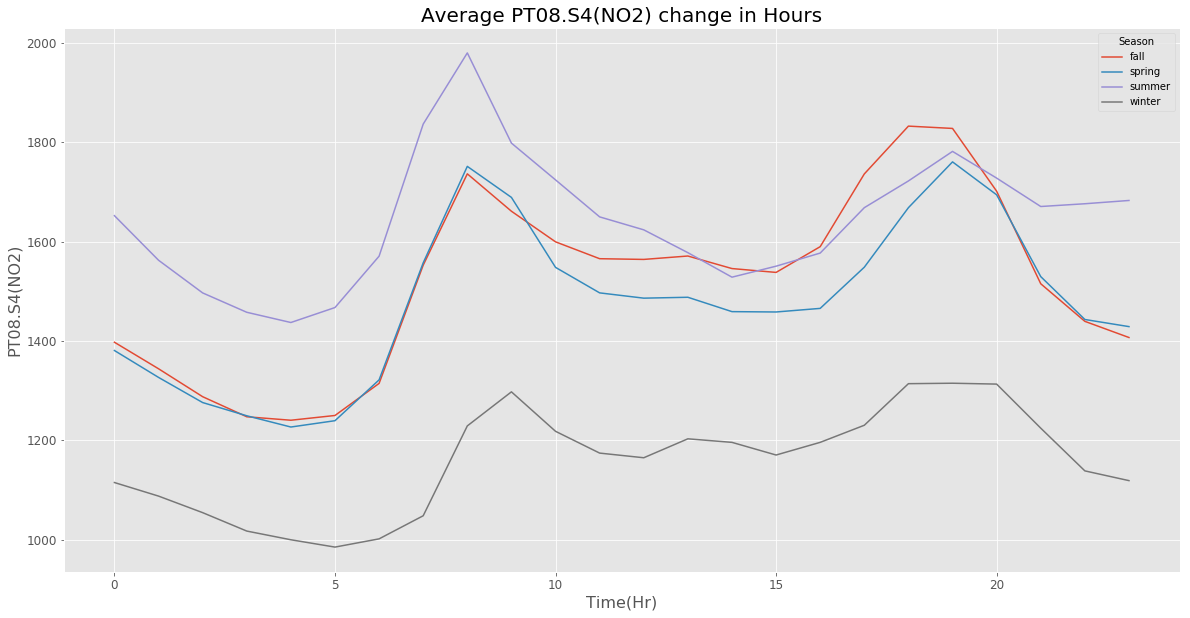

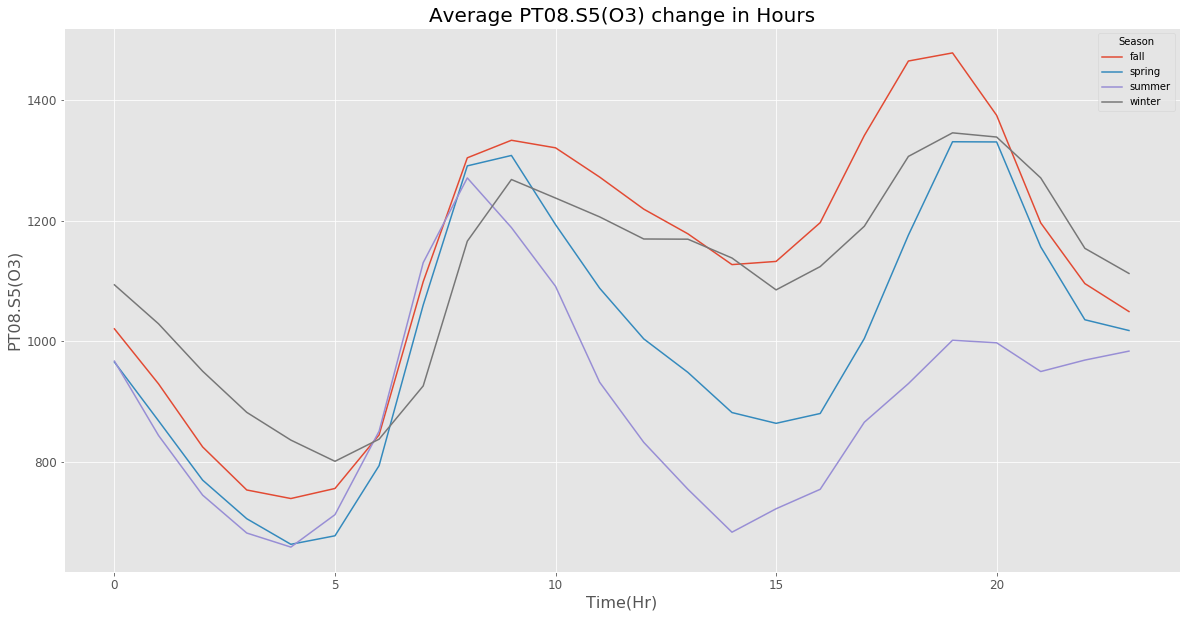

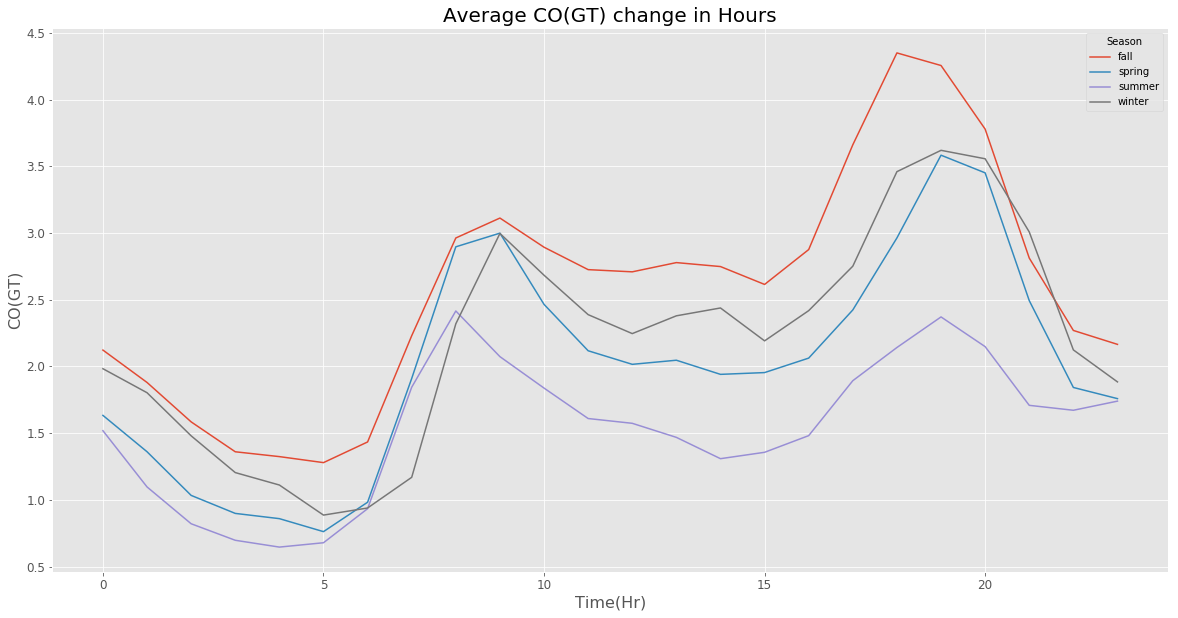

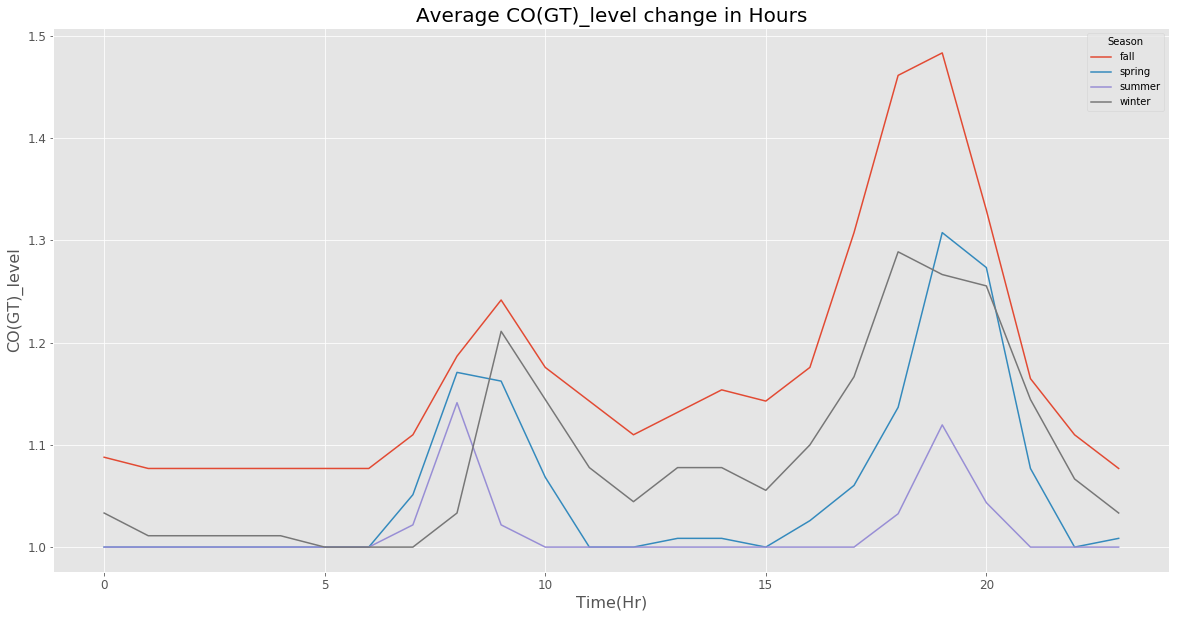

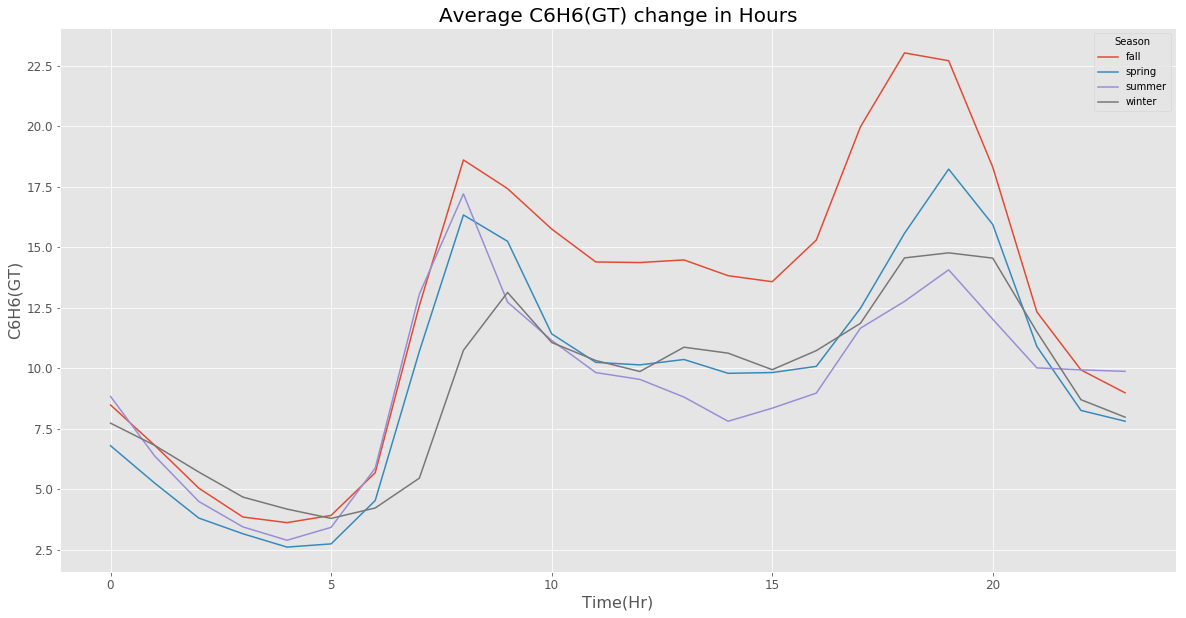

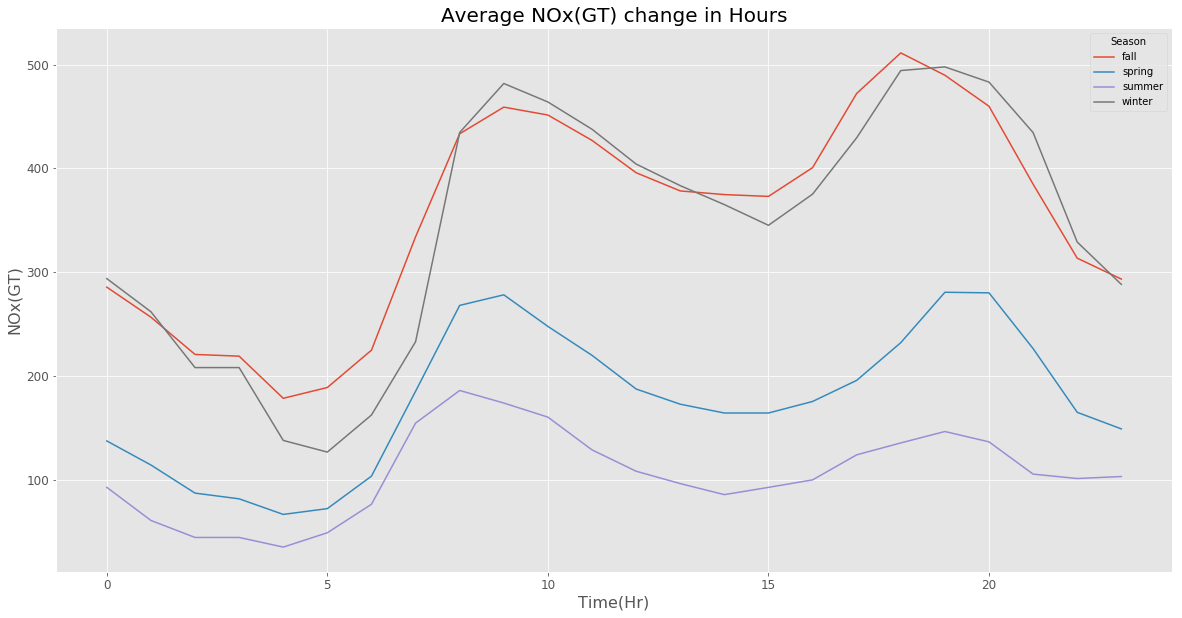

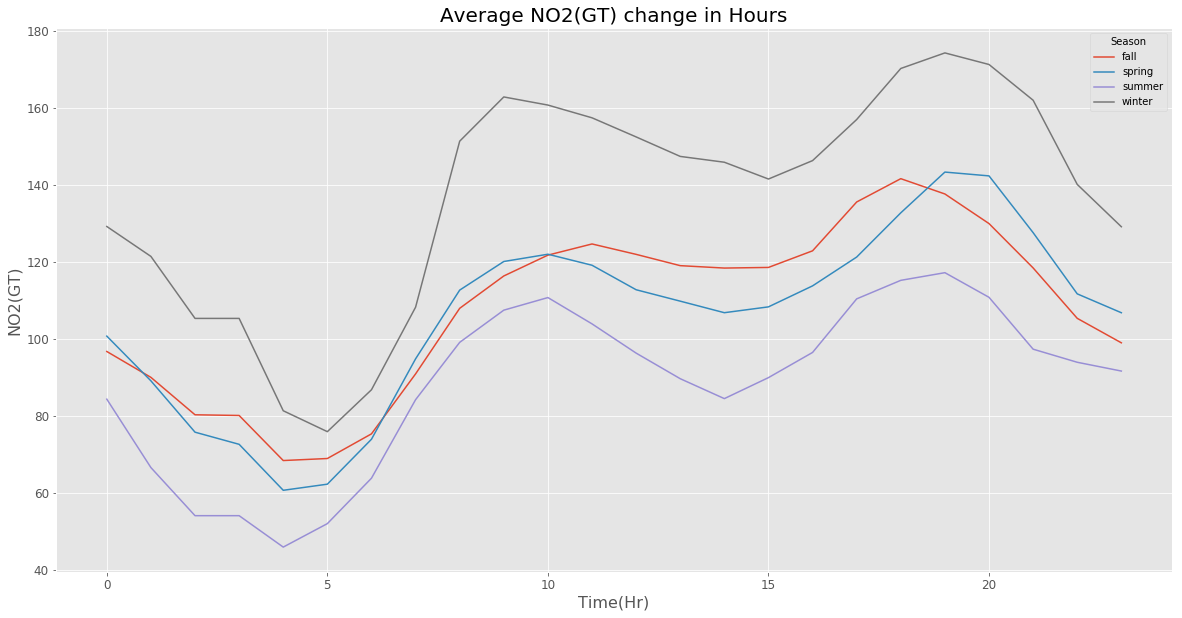

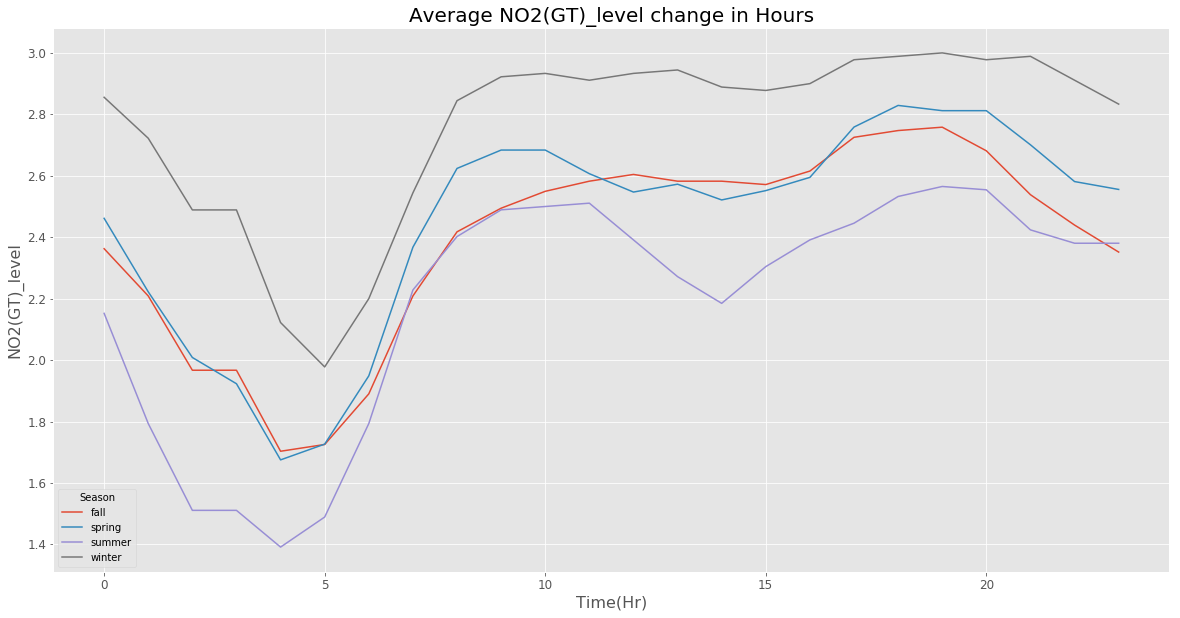

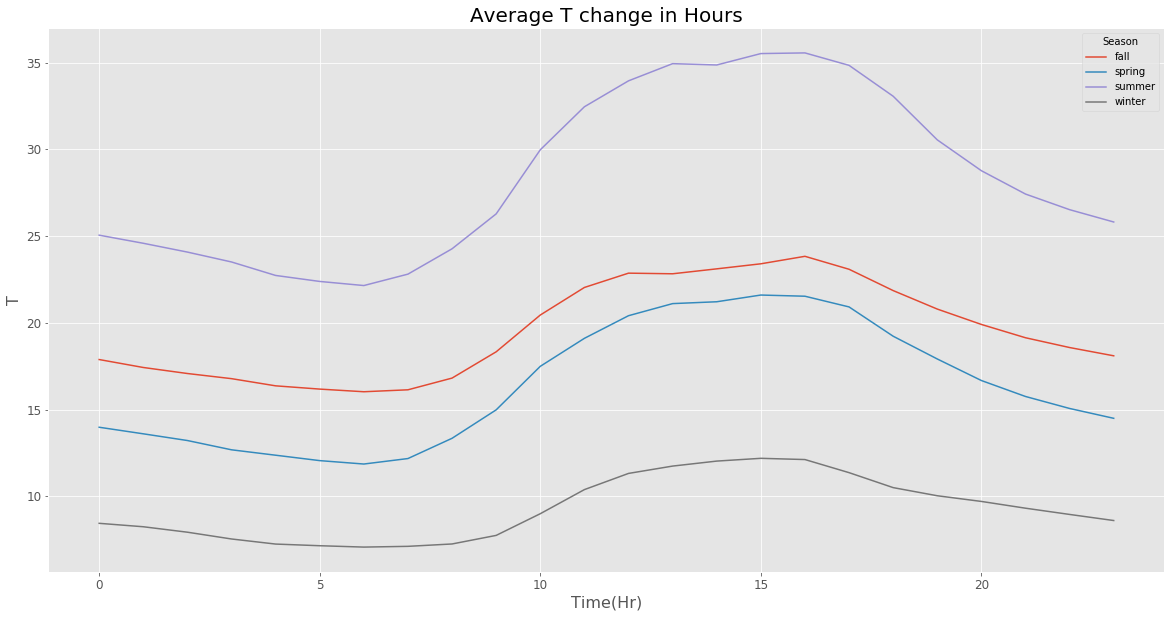

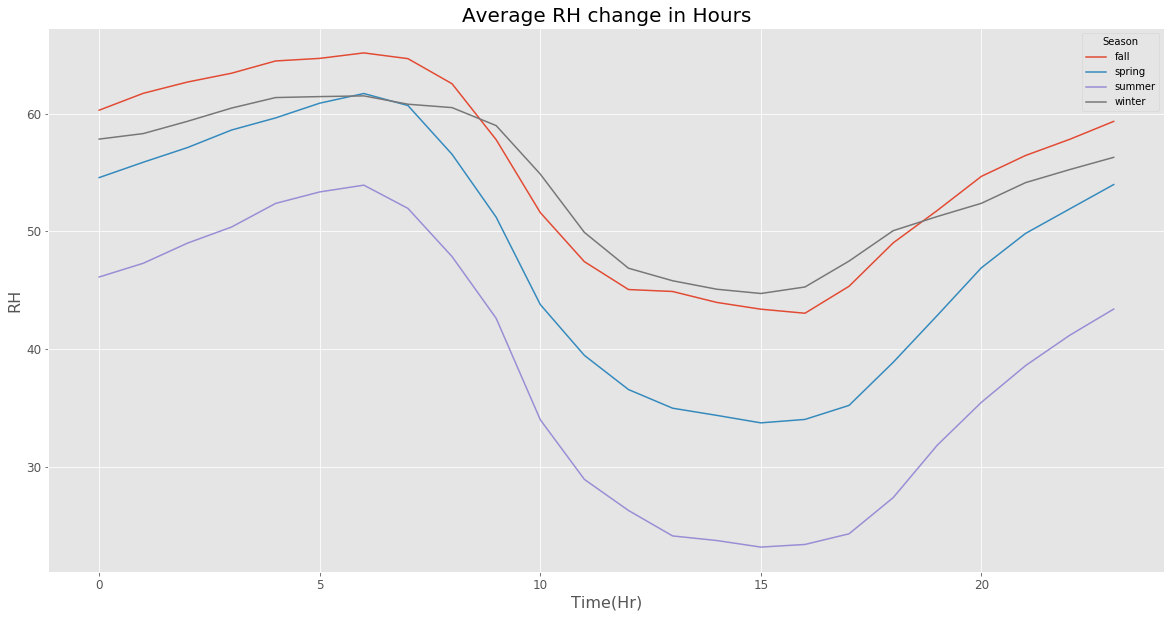

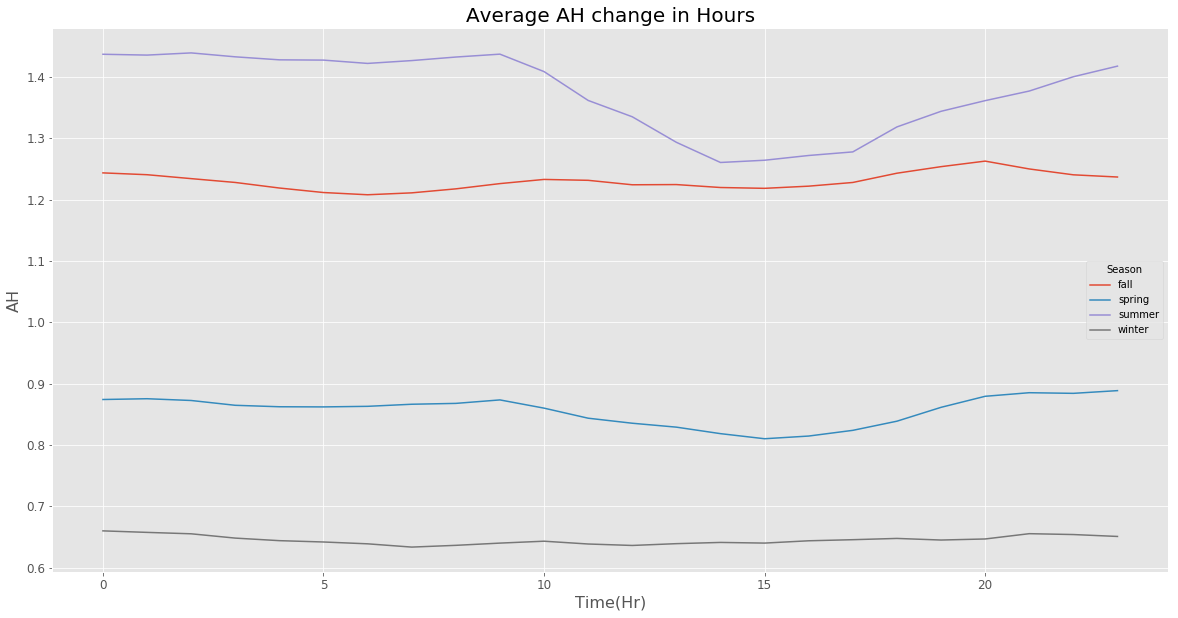

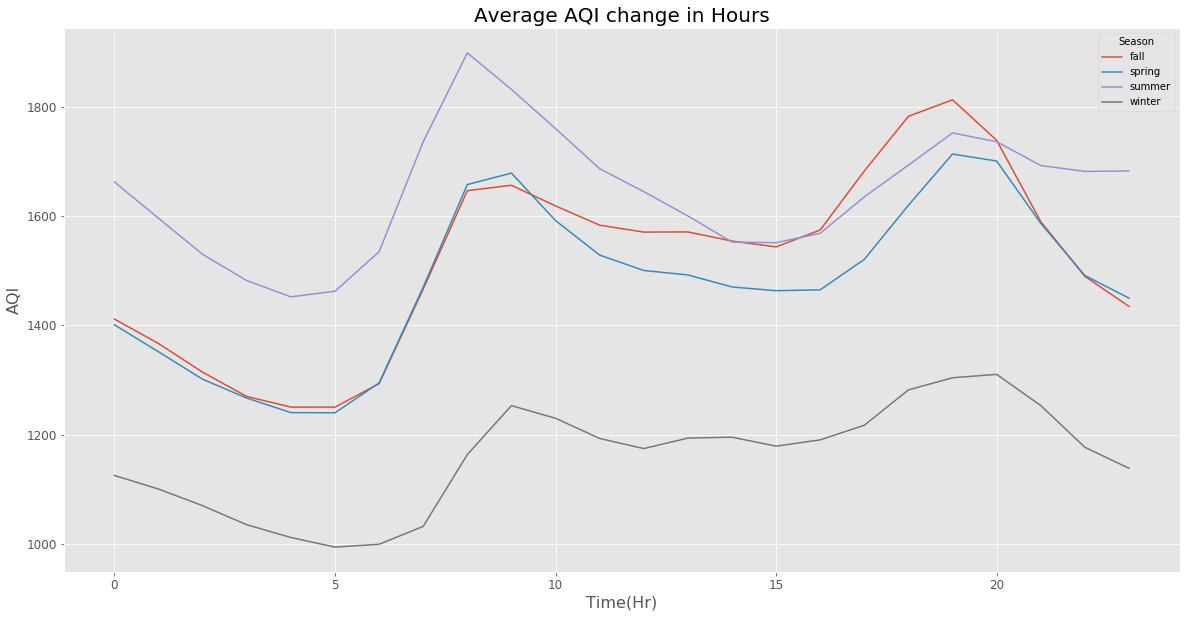

In [98]:
for col in AQcol:
    generate_hour_plot(col)

In [35]:
df.head()

DateTime  idx        Date  Hour  Weekday  Week  Month  \
0  2004-03-10 18:00:00    0  2004-03-10    18        2    11      3   
1  2004-03-10 19:00:00    1  2004-03-10    19        2    11      3   
2  2004-03-10 20:00:00    2  2004-03-10    20        2    11      3   
3  2004-03-10 21:00:00    3  2004-03-10    21        2    11      3   
4  2004-03-10 22:00:00    4  2004-03-10    22        2    11      3   

   PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)  \
0       1360.0         1046.0        1056.0        1692.0       1268.0   
1       1292.0          955.0        1174.0        1559.0        972.0   
2       1402.0          939.0        1140.0        1555.0       1074.0   
3       1376.0          948.0        1092.0        1584.0       1203.0   
4       1272.0          836.0        1205.0        1490.0       1110.0   

   CO(GT)  C6H6(GT)  NOx(GT)  NO2(GT)     T    RH      AH  
0     2.6      11.9    166.0    113.0  13.6  48.9  0.7578  
1     2.0       9.4    103.0     92.0  13.3  47.7  0.7255  
2     2.2       9.0    131.0    114.0  11.9  54.0  0.7502  
3     2.2       9.2    172.0    122.0  11.0  60.0  0.7867  
4     1.6       6.5    131.0    116.0  11.2  59.6  0.7888